In [1]:
from sklearn.datasets import make_classification
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
import numpy
from tqdm import tqdm
import numpy as np
from sklearn.metrics.pairwise import euclidean_distances


x,y = make_classification(n_samples=10000, n_features=2, n_informative=2, n_redundant= 0, n_clusters_per_class=1, random_state=60)
X_train, X_test, y_train, y_test = train_test_split(x,y,stratify=y,random_state=42)


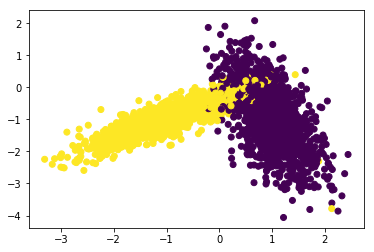

In [2]:
%matplotlib inline
import matplotlib.pyplot as plt
colors = {0:'red', 1:'blue'}
plt.scatter(X_test[:,0], X_test[:,1],c=y_test)
plt.show()

# Implementing Custom RandomSearchCV

### Referred the assignment Reference for whole assignment

## Random Search Custom Method

In [3]:
from sklearn.metrics import accuracy_score

def KFold(xtrain,fold):
    #print(xtrain.shape)
    splits=list(map(int,numpy.linspace(0,xtrain.shape[0],fold+1)))
    #print(splits)
    xtrain_splits=[]
    cnt=0
    for i in range(len(splits)-1):
        l1=[]
        if cnt!=0:
            l1.extend((splits[i]+1,splits[i+1]))
        else:
            l1.extend((splits[i],splits[i+1]))
        #print(l1)
        cnt+=1
        xtrain_splits.append(l1)
    #print(xtrain_splits)
    return xtrain_splits
   
def RandomSearch(x_train,y_train,classifier, param_tuple, folds):
    trainscores = []
    testscores  = [] 
    while True:
        params= set(list(map(int,np.random.uniform(param_tuple[0], param_tuple[1], 10))))
        if len(params)==10:
            break
    params=sorted(params)
    #params= list(map(int,np.random.uniform(param_tuple[0], param_tuple[1], 10)))
    for k in tqdm(params):
        trainscores_folds = []
        testscores_folds  = []
        x=KFold(x_train,folds)
        for j in range(0, folds):
            x1=x[j][0],x[j][1]
            #print(x1[0],x1[1])
            xtrain_indices=list(set(list(range(0, len(x_train))))-set(list(range(x1[0],x1[1]))))
            xtest_indices=list(range(x1[0],x1[1]))
            X_test = x_train[xtest_indices]
            Y_test = y_train[xtest_indices]
            X_train = x_train[xtrain_indices]
            Y_train = y_train[xtrain_indices]
            # check this out: https://stackoverflow.com/a/9755548/4084039
            """train_indices = randomly_select_60_percent_indices_in_range_from_1_to_len(x_train)
            test_indices  = list(set(list(range(1, len(x_train)))) - set(train_indices))

            # selecting the data points based on the train_indices and test_indices
            X_train = x_train[train_indices]
            Y_train = y_train[train_indices]
            X_test  = x_train[test_indices]
            Y_test  = y_train[test_indices]"""

            classifier.n_neighbors = k
            classifier.fit(X_train,Y_train)

            Y_predicted = classifier.predict(X_test)
            testscores_folds.append(accuracy_score(Y_test, Y_predicted))

            Y_predicted = classifier.predict(X_train)
            trainscores_folds.append(accuracy_score(Y_train, Y_predicted))
        trainscores.append(np.mean(np.array(trainscores_folds)))
        testscores.append(np.mean(np.array(testscores_folds)))
    return trainscores,testscores,params

## Hyper-parameter VS accuracy plot

100%|██████████████████████████████████████████████████████████████████████████████████| 10/10 [00:02<00:00,  4.05it/s]


[6, 7, 8, 12, 13, 14, 15, 16, 17, 18]


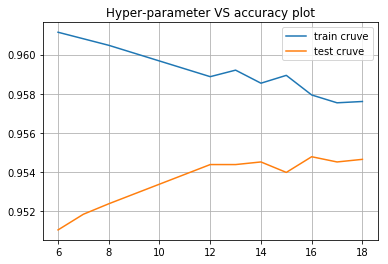

In [4]:

from sklearn.metrics import accuracy_score
from sklearn.neighbors import KNeighborsClassifier
import matplotlib.pyplot as plt
import random
import warnings
warnings.filterwarnings("ignore")

neigh = KNeighborsClassifier()

params_tuple = (3,23)
folds = 3

trainscores,testscores,params = RandomSearch(X_train, y_train, neigh, params_tuple, folds)
#print(trainscores)
#print(testscores)
#print(params)

print(params)
plt.plot(params,trainscores, label='train cruve')
plt.plot(params,testscores, label='test cruve')
plt.grid()
plt.title('Hyper-parameter VS accuracy plot')
plt.legend()
plt.show()

### Observation->
###  i)From plot it is observed that max test error and min train error which occur simultaneoulsy are when k=16

In [5]:
def plot_decision_boundary(X1, X2, y, clf):
        # Create color maps
    cmap_light = ListedColormap(['#FFAAAA', '#AAFFAA', '#AAAAFF'])
    cmap_bold = ListedColormap(['#FF0000', '#00FF00', '#0000FF'])

    x_min, x_max = X1.min() - 1, X1.max() + 1
    y_min, y_max = X2.min() - 1, X2.max() + 1
    
    xx, yy = np.meshgrid(np.arange(x_min, x_max, 0.02), np.arange(y_min, y_max, 0.02))
    Z = clf.predict(np.c_[xx.ravel(), yy.ravel()])
    Z = Z.reshape(xx.shape)

    plt.figure()
    plt.pcolormesh(xx, yy, Z, cmap=cmap_light)
    # Plot also the training points
    plt.scatter(X1, X2, c=y, cmap=cmap_bold)
    
    plt.xlim(xx.min(), xx.max())
    plt.ylim(yy.min(), yy.max())
    plt.title("2-Class classification (k = %i)" % (clf.n_neighbors))
    plt.show()

## Plot Decision Boundary

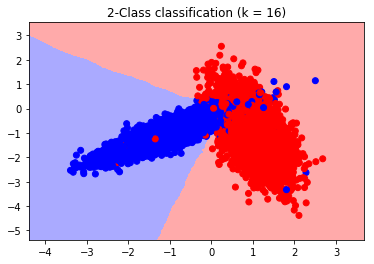

In [6]:
from matplotlib.colors import ListedColormap
neigh = KNeighborsClassifier(n_neighbors = 16)
neigh.fit(X_train, y_train)
plot_decision_boundary(X_train[:, 0], X_train[:, 1], y_train, neigh)